In [1]:
from keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

Using TensorFlow backend.


In [48]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

1 11 21 31 41 51 61 2 12 22 32 42 52 62 3 13 23 33 43 53 63 4 14 24 34 44 54 64 5 15 25 35 45 55 65 6 16 26 36 46 56 66 7 17 27 37 47 57 67 8 18 28 38 48 58 68 9 19 29 39 49 59 69 10 20 30 40 50 60 70 

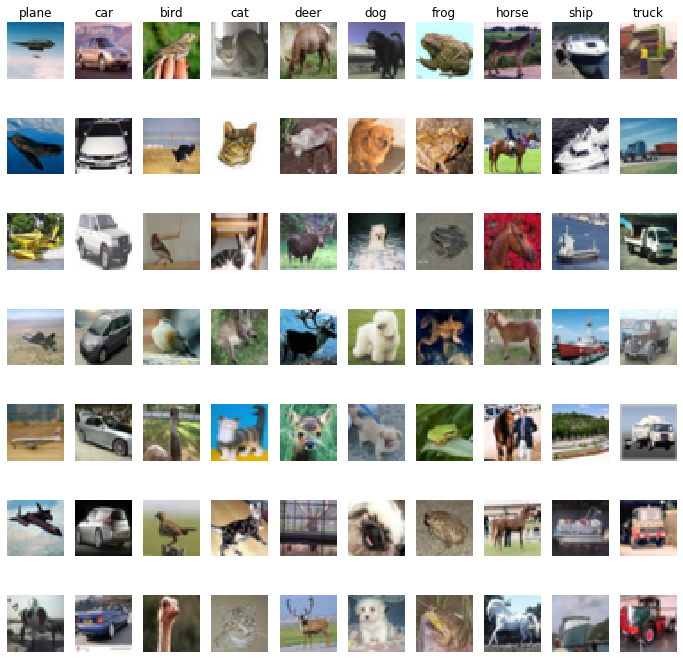

In [56]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize=(12, 12))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        print(plt_idx,end=' ')
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

In [5]:
x_train.shape

(50000, 3072)

In [6]:
x_test[1,:].shape

(3072,)

In [40]:
class knn(object):
    def __init__(self):
        pass
    
    def train(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def predict(self,x_test,k,method='l1'):
        num_test = x_test.shape[0]
        y_pred = np.zeros(num_test, dtype = self.y_train.dtype)
        
        if method == 'l1':
            for i in tqdm(range(num_test)):
                dis = np.sum(np.abs(self.x_train - x_test[i,:]),axis=1)
                '''np.partition(~, 2)와 같은 경우는 리스트에서 순서 상관없이 작은 숫자 2개를 뽑아 왼쪽으로 놓겠다는 의미
                np.partition(~, -2)와 같은 경우는 리스트에서 순서 상관없이 큰 값 2개를 뽑아 오른쪽으로 놓겠다는 의미이다.
                np.argpartition은 partition과 같고, index를 리턴한다.'''
                getK = np.argpartition(dis,k)[:k]
                min_index = Counter([self.y_train[j][0] for j in getK]).most_common()[0][0]
                y_pred[i] = self.y_train[min_index]
            return y_pred
        
        elif method == 'l2':
            for i in tqdm(range(num_test)):
                dis = np.sqrt(np.sum(np.square(self.x_train - x_test[i,:]),axis=1))
                getK = np.argpartition(dis,k)[:k]
                min_index = Counter([self.y_train[j][0] for j in getK]).most_common()[0][0]
                y_pred[i] = self.y_train[min_index]
            return y_pred

In [44]:
xx_train,xx_val,yy_train,yy_val = train_test_split(x_train,y_train,test_size=0.5,random_state=10)


In [45]:
knns = knn()
knns.train(xx_train[:10000],yy_train[:10000])
y_pred = knns.predict(x_test[:1000],5)
print('score:',np.mean(y_pred[:100]==y_test[:100]))

100%|██████████| 1000/1000 [00:32<00:00, 30.40it/s]

score: 0.1062


## 정확도가 안나온다..